## Stokes flow in periodic geometry

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pystokes
import pyforces

In [2]:
#Paramter declaration and memory allocations
a, eta, dim = 1, 1.0/6, 3
L, Ng = 10, 32

Np, Nt = 1, Ng*Ng
r = np.zeros(3*Np)
F = np.zeros(3*Np)
p = np.zeros(3*Np)
S = np.zeros(5*Np)
rt = np.zeros(dim*Nt)                   # Memory Allocation for field points
vv = np.zeros(dim*Nt)                   # Memory Allocation for field Velocities

xx = np.linspace(0, L, Ng)
yy = np.linspace(0, L, Ng)
X, Y = np.meshgrid(xx, yy)
rt[0:2*Nt] = np.concatenate((X.reshape(Ng*Ng), Y.reshape(Ng*Ng)))

#initialise
r[0], r[1], r[2]= L/2, L/2, 0   #position
p[0], p[1], p[2]= 0, 1, 0   #orientation
F[0], F[1], F[2]= 0, 1, 0   # force

#stresslet
S0=1
for i in range(Np):
    S[i]      = S0*(p[i]*p[i] -(1.0/3))
    S[i+ Np]  = S0*(p[i + Np]*p[i + Np] -(1.0/3))
    S[i+ 2*Np]  = S0*(p[i]*p[i + Np])
    S[i+ 3*Np] = S0*(p[i]*p[i + 2*Np])
    S[i+ 4*Np] = S0*(p[i + Np]*p[i + 2*Np])
    
    
####Instantiate the Flow class
pFlow = pystokes.periodic.Flow(a, Np, eta, L, Nt)

### Stokeslet flow

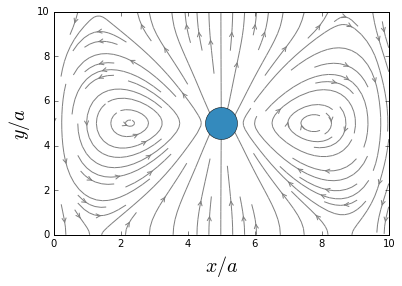

In [3]:
%matplotlib inline
pFlow.stokesletV(vv, rt, r, F)
vx, vy = vv[0:Nt].reshape(Ng, Ng), vv[Nt:2*Nt].reshape(Ng, Ng)
plt.figure()
plt.plot(r[0], r[1], marker='o', markerfacecolor='#348ABD', markersize=32 )   # plot the particle at r
plt.streamplot(X, Y, vx, vy, color="grey", density=1, arrowstyle='->', arrowsize =1)
plt.xlim([0, L])
plt.ylim([0, L])
plt.xlabel(r'$x/a$', fontsize=20)
plt.ylabel(r'$y/a$', fontsize=20)
plt.show()

## Stresslet Flow

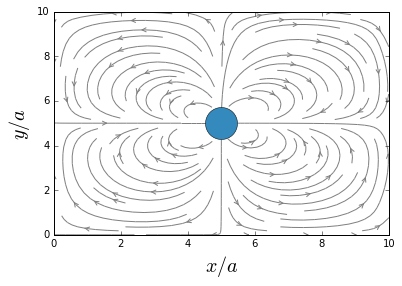

In [4]:
vv=vv*0  # reset the flow
pFlow.stressletV(vv, rt, r, S)
vx, vy = vv[0:Nt].reshape(Ng, Ng), vv[Nt:2*Nt].reshape(Ng, Ng)
plt.figure()
plt.plot(r[0], r[1], marker='o', markerfacecolor='#348ABD', markersize=32 )   # plot the particle at r
plt.streamplot(X, Y, vx, vy, color="grey", density=1, arrowstyle='->', arrowsize =1)
plt.xlim([0, L])
plt.ylim([0, L])
plt.xlabel(r'$x/a$', fontsize=20)
plt.ylabel(r'$y/a$', fontsize=20)
plt.show()